In [427]:
!git clone https://github.com/charvishukla/cse151a-pokemon-project.git

fatal: destination path 'cse151a-pokemon-project' already exists and is not an empty directory.


In [428]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

In [429]:
# IMPORT DATASET HERE
pokemon_datamined = pd.read_csv("pokemon_datamined_dataset.csv")
pokemon_datamined.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [430]:
pokemon_TCG= pd.read_csv("pokemon-tcg-dataset(1999-2023).csv")
pokemon_TCG.columns

Index(['id', 'set', 'series', 'publisher', 'generation', 'release_date',
       'artist', 'name', 'set_num', 'types', 'supertype', 'subtypes', 'level',
       'hp', 'evolvesFrom', 'evolvesTo', 'abilities', 'attacks', 'weaknesses',
       'retreatCost', 'convertedRetreatCost', 'rarity', 'flavorText',
       'nationalPokedexNumbers', 'legalities', 'resistances', 'rules',
       'regulationMark', 'ancientTrait'],
      dtype='object')

In [431]:
price_guide = pd.read_csv("price-guide.csv", low_memory=False)
price_guide.columns

Index(['id', 'console-name', 'product-name', 'loose-price', 'cib-price',
       'new-price', 'graded-price', 'box-only-price', 'manual-only-price',
       'bgs-10-price', 'condition-17-price', 'condition-18-price',
       'gamestop-price', 'gamestop-trade-price', 'retail-loose-buy',
       'retail-loose-sell', 'retail-cib-buy', 'retail-cib-sell',
       'retail-new-buy', 'retail-new-sell', 'upc', 'sales-volume', 'genre',
       'tcg-id', 'asin', 'epid', 'release-date'],
      dtype='object')

## Price Guide Dataset

In [433]:
price_guide.dtypes

id                        int64
console-name             object
product-name             object
loose-price              object
cib-price                object
new-price                object
graded-price             object
box-only-price           object
manual-only-price        object
bgs-10-price             object
condition-17-price       object
condition-18-price       object
gamestop-price          float64
gamestop-trade-price    float64
retail-loose-buy         object
retail-loose-sell        object
retail-cib-buy           object
retail-cib-sell          object
retail-new-buy           object
retail-new-sell          object
upc                     float64
sales-volume              int64
genre                   float64
tcg-id                   object
asin                    float64
epid                    float64
release-date             object
dtype: object

### Number of Null rows

In [435]:
print('id', price_guide['id'].isna().sum())
print('console-name', price_guide['console-name'].isna().sum())
print('product-name', price_guide['product-name'].isna().sum())
print('loose-price', price_guide['loose-price'].isna().sum())
print('cib-price', price_guide['cib-price'].isna().sum())
print('new-price', price_guide['new-price'].isna().sum())
print('graded-price', price_guide['graded-price'].isna().sum())
print('box-only-price', price_guide['box-only-price'].isna().sum())
print('manual-only-price', price_guide['manual-only-price'].isna().sum())
print('bgs-10-price', price_guide['bgs-10-price'].isna().sum())
print('condition-17-price', price_guide['condition-17-price'].isna().sum())
print('condition-18-price', price_guide['condition-18-price'].isna().sum())
print('gamestop-price', price_guide['gamestop-price'].isna().sum())
print('gamestop-trade-price', price_guide['gamestop-trade-price'].isna().sum())
print('retail-loose-buy', price_guide['retail-loose-buy'].isna().sum())
print('retail-loose-sell', price_guide['retail-loose-sell'].isna().sum())
print('retail-cib-buy', price_guide['retail-cib-buy'].isna().sum())
print('retail-cib-sell', price_guide['retail-cib-sell'].isna().sum())
print('retail-new-buy', price_guide['retail-new-buy'].isna().sum())
print('retail-new-sell', price_guide['retail-new-sell'].isna().sum())
print('upc', price_guide['upc'].isna().sum())
print('sales-volume', price_guide['sales-volume'].isna().sum())
print('genre', price_guide['genre'].isna().sum())
print('tcg-id', price_guide['tcg-id'].isna().sum())
print('asin', price_guide['asin'].isna().sum())
print('epid', price_guide['epid'].isna().sum())
print('release-date', price_guide['release-date'].isna().sum())


id 0
console-name 0
product-name 0
loose-price 6021
cib-price 49388
new-price 42160
graded-price 23691
box-only-price 23446
manual-only-price 23412
bgs-10-price 23397
condition-17-price 23155
condition-18-price 23402
gamestop-price 60296
gamestop-trade-price 60296
retail-loose-buy 39523
retail-loose-sell 6021
retail-cib-buy 49912
retail-cib-sell 49388
retail-new-buy 42659
retail-new-sell 42160
upc 60295
sales-volume 0
genre 60296
tcg-id 29622
asin 60296
epid 60296
release-date 4616


In [436]:
print("size", price_guide['console-name'].shape)
print("console-name count", price_guide['console-name'].nunique())
#print("console-name", price_guide['console-name'].unique())

size (60296,)
console-name count 514


In [437]:
print("product-name count", price_guide['product-name'].nunique())
print("product-name", price_guide['product-name'].unique())

product-name count 52301
product-name ['Charizard #6' 'Dragonite #149' 'Ivysaur #2' ...
 'Zoroark [Cosmos Holo] #73' 'Zoroark [Reverse Holo] #73'
 'Zorua [Reverse Holo] #72']


In [438]:
price_guide.drop(columns=['gamestop-trade-price', 
                          'gamestop-price', 'cib-price', 'new-price',
                          'retail-cib-buy', 
                          'retail-new-sell', 
                          'retail-new-buy', 'retail-cib-sell', 
                         'asin', 'epid', 'genre', 'upc'], inplace=True)

In [439]:
price_guide.dropna(axis=0, how='any', inplace=True)
price_guide

,id,console-name,product-name,loose-price,graded-price,box-only-price,manual-only-price,bgs-10-price,condition-17-price,condition-18-price,retail-loose-buy,retail-loose-sell,sales-volume,tcg-id,release-date
2792,7418473,Pokemon 2010 World Collection,Pikachu [English],$60.00,$60.29,$66.00,$124.10,$186.00,$161.00,$74.00,$26.40,$65.99,27,215153,2010-07-08
2808,962237,Pokemon 2020 Battle Academy,Charizard #3,$4.25,$19.31,$21.00,$32.41,$49.00,$42.00,$19.00,$0.90,$4.69,18,175270,2018-09-07
2971,1420024,Pokemon Alolan Sandslash & Ninetales,Alolan Sandslash #30,$4.51,$85.00,$94.00,$102.00,$153.00,$133.00,$61.00,$1.00,$4.99,6,168220,2018-06-01
3001,959105,Pokemon Ancient Origins,Ampharos EX #87,$9.77,$32.76,$36.00,$109.86,$165.00,$143.00,$66.00,$2.80,$10.99,139,101509,2015-08-12
3031,959117,Pokemon Ancient Origins,Energy Retrieval #99,$19.99,$20.50,$23.00,$58.90,$88.00,$77.00,$35.00,$6.60,$21.99,228,101521,2015-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60216,886727,Pokemon XY,Skarmory EX #145,$6.50,$41.25,$45.00,$1042.92,$1564.00,$1356.00,$626.00,$1.40,$7.19,27,89249,2014-02-05
60262,886723,Pokemon XY,Venusaur EX #141,$23.71,$106.88,$118.00,$188.90,$283.00,$246.00,$113.00,$7.80,$25.99,122,90325,2014-02-05
60281,886728,Pokemon XY,Xerneas EX #146,$15.92,$50.60,$56.00,$82.16,$123.00,$107.00,$49.00,$4.50,$17.99,74,90672,2014-02-05
60286,886726,Pokemon XY,Yveltal EX #144,$16.00,$50.00,$55.00,$60.00,$90.00,$78.00,$36.00,$4.50,$17.99,84,90700,2014-02-05


In [440]:
def stringtoint(string):
    new_string = string[1:]
    return float(new_string)

In [441]:
price_guide.dtypes

id                     int64
console-name          object
product-name          object
loose-price           object
graded-price          object
box-only-price        object
manual-only-price     object
bgs-10-price          object
condition-17-price    object
condition-18-price    object
retail-loose-buy      object
retail-loose-sell     object
sales-volume           int64
tcg-id                object
release-date          object
dtype: object

In [442]:
columns_to_convert = ['loose-price', 
                      'graded-price', 
                      'box-only-price', 
                      'manual-only-price', 
                      'bgs-10-price', 'condition-17-price', 
                      'condition-18-price', 'retail-loose-buy', 
                      'retail-loose-sell']


In [443]:
for col in columns_to_convert:
    price_guide[col] = price_guide[col].apply(stringtoint)


price_guide

,id,console-name,product-name,loose-price,graded-price,box-only-price,manual-only-price,bgs-10-price,condition-17-price,condition-18-price,retail-loose-buy,retail-loose-sell,sales-volume,tcg-id,release-date
2792,7418473,Pokemon 2010 World Collection,Pikachu [English],60.00,60.29,66.0,124.10,186.0,161.0,74.0,26.4,65.99,27,215153,2010-07-08
2808,962237,Pokemon 2020 Battle Academy,Charizard #3,4.25,19.31,21.0,32.41,49.0,42.0,19.0,0.9,4.69,18,175270,2018-09-07
2971,1420024,Pokemon Alolan Sandslash & Ninetales,Alolan Sandslash #30,4.51,85.00,94.0,102.00,153.0,133.0,61.0,1.0,4.99,6,168220,2018-06-01
3001,959105,Pokemon Ancient Origins,Ampharos EX #87,9.77,32.76,36.0,109.86,165.0,143.0,66.0,2.8,10.99,139,101509,2015-08-12
3031,959117,Pokemon Ancient Origins,Energy Retrieval #99,19.99,20.50,23.0,58.90,88.0,77.0,35.0,6.6,21.99,228,101521,2015-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60216,886727,Pokemon XY,Skarmory EX #145,6.50,41.25,45.0,1042.92,1564.0,1356.0,626.0,1.4,7.19,27,89249,2014-02-05
60262,886723,Pokemon XY,Venusaur EX #141,23.71,106.88,118.0,188.90,283.0,246.0,113.0,7.8,25.99,122,90325,2014-02-05
60281,886728,Pokemon XY,Xerneas EX #146,15.92,50.60,56.0,82.16,123.0,107.0,49.0,4.5,17.99,74,90672,2014-02-05
60286,886726,Pokemon XY,Yveltal EX #144,16.00,50.00,55.0,60.00,90.0,78.0,36.0,4.5,17.99,84,90700,2014-02-05


In [444]:
columns_to_convert2 = ['loose-price', 
                      'graded-price', 
                      'box-only-price', 
                      'manual-only-price', 
                      'bgs-10-price', 'condition-17-price', 
                      'condition-18-price', 'retail-loose-buy', 
                      'retail-loose-sell']
price_guide_subset = price_guide[columns_to_convert2]
price_guide_subset

,loose-price,graded-price,box-only-price,manual-only-price,bgs-10-price,condition-17-price,condition-18-price,retail-loose-buy,retail-loose-sell
2792,60.00,60.29,66.0,124.10,186.0,161.0,74.0,26.4,65.99
2808,4.25,19.31,21.0,32.41,49.0,42.0,19.0,0.9,4.69
2971,4.51,85.00,94.0,102.00,153.0,133.0,61.0,1.0,4.99
3001,9.77,32.76,36.0,109.86,165.0,143.0,66.0,2.8,10.99
3031,19.99,20.50,23.0,58.90,88.0,77.0,35.0,6.6,21.99
...,...,...,...,...,...,...,...,...,...
60216,6.50,41.25,45.0,1042.92,1564.0,1356.0,626.0,1.4,7.19
60262,23.71,106.88,118.0,188.90,283.0,246.0,113.0,7.8,25.99
60281,15.92,50.60,56.0,82.16,123.0,107.0,49.0,4.5,17.99
60286,16.00,50.00,55.0,60.00,90.0,78.0,36.0,4.5,17.99


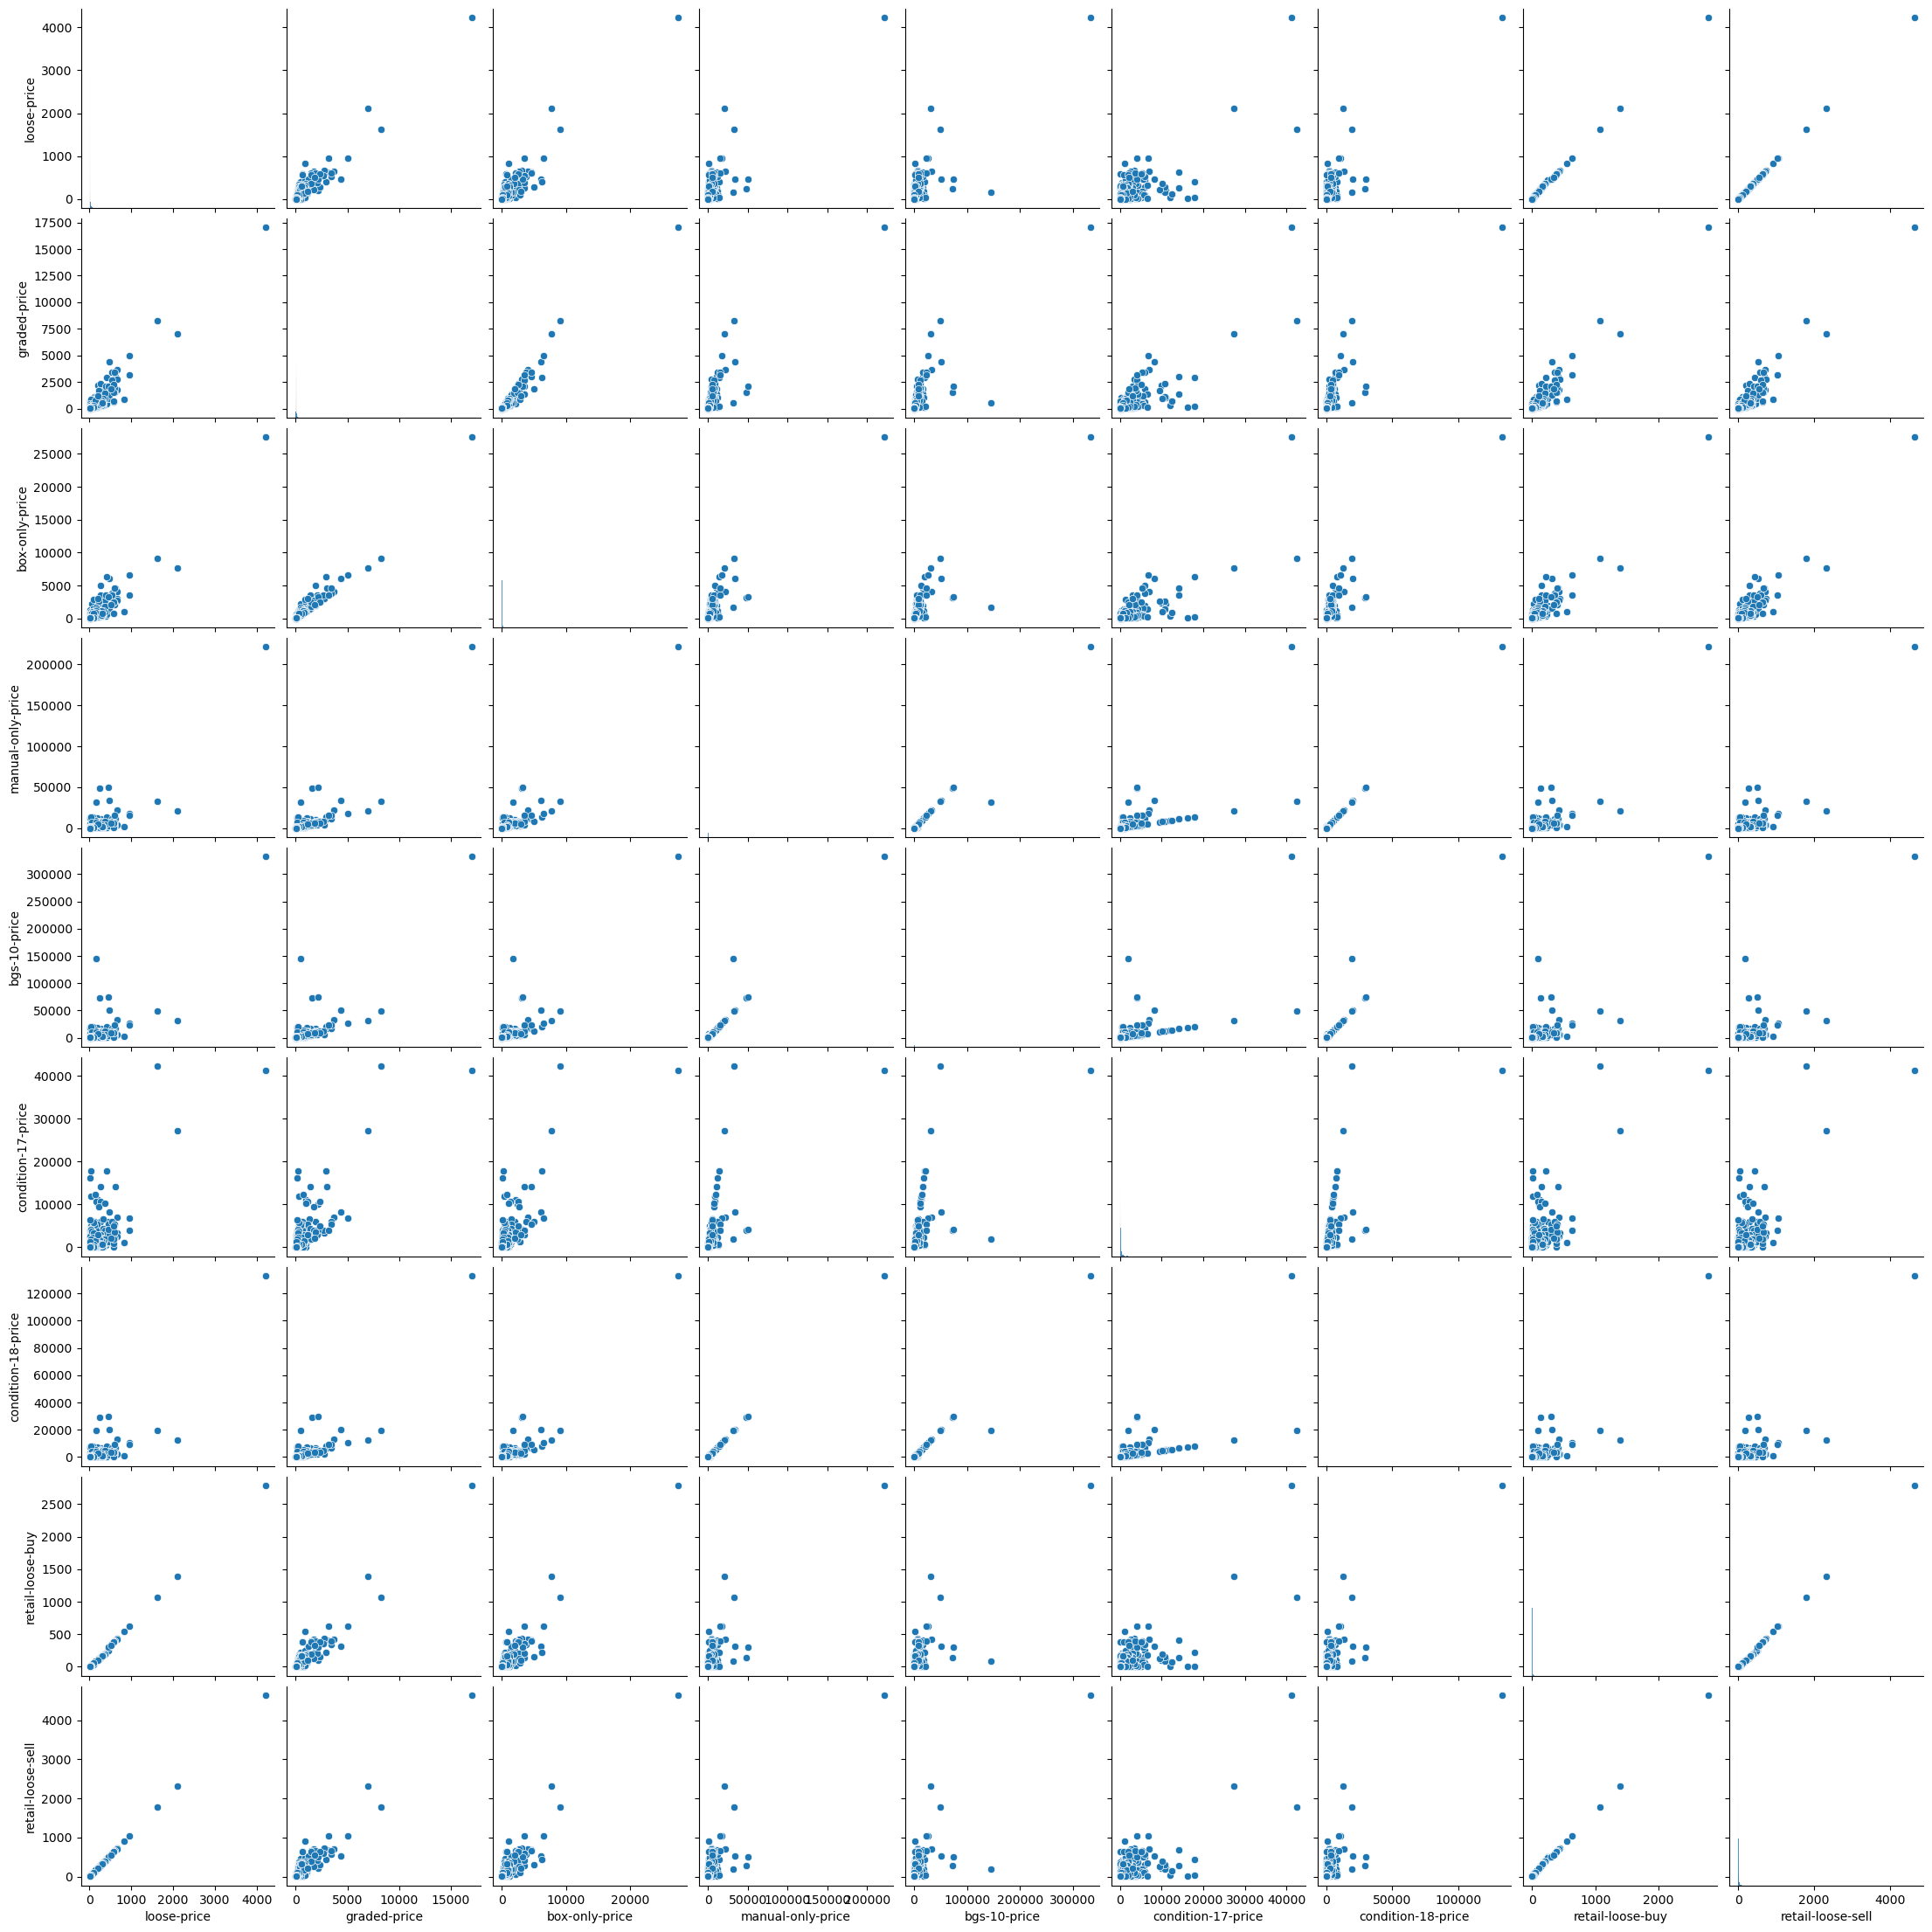

In [445]:
sns.pairplot(price_guide_subset)

In [446]:
drop_extreme = price_guide_subset[(np.abs(stats.zscore(price_guide_subset)) < 3).all(axis=1)]

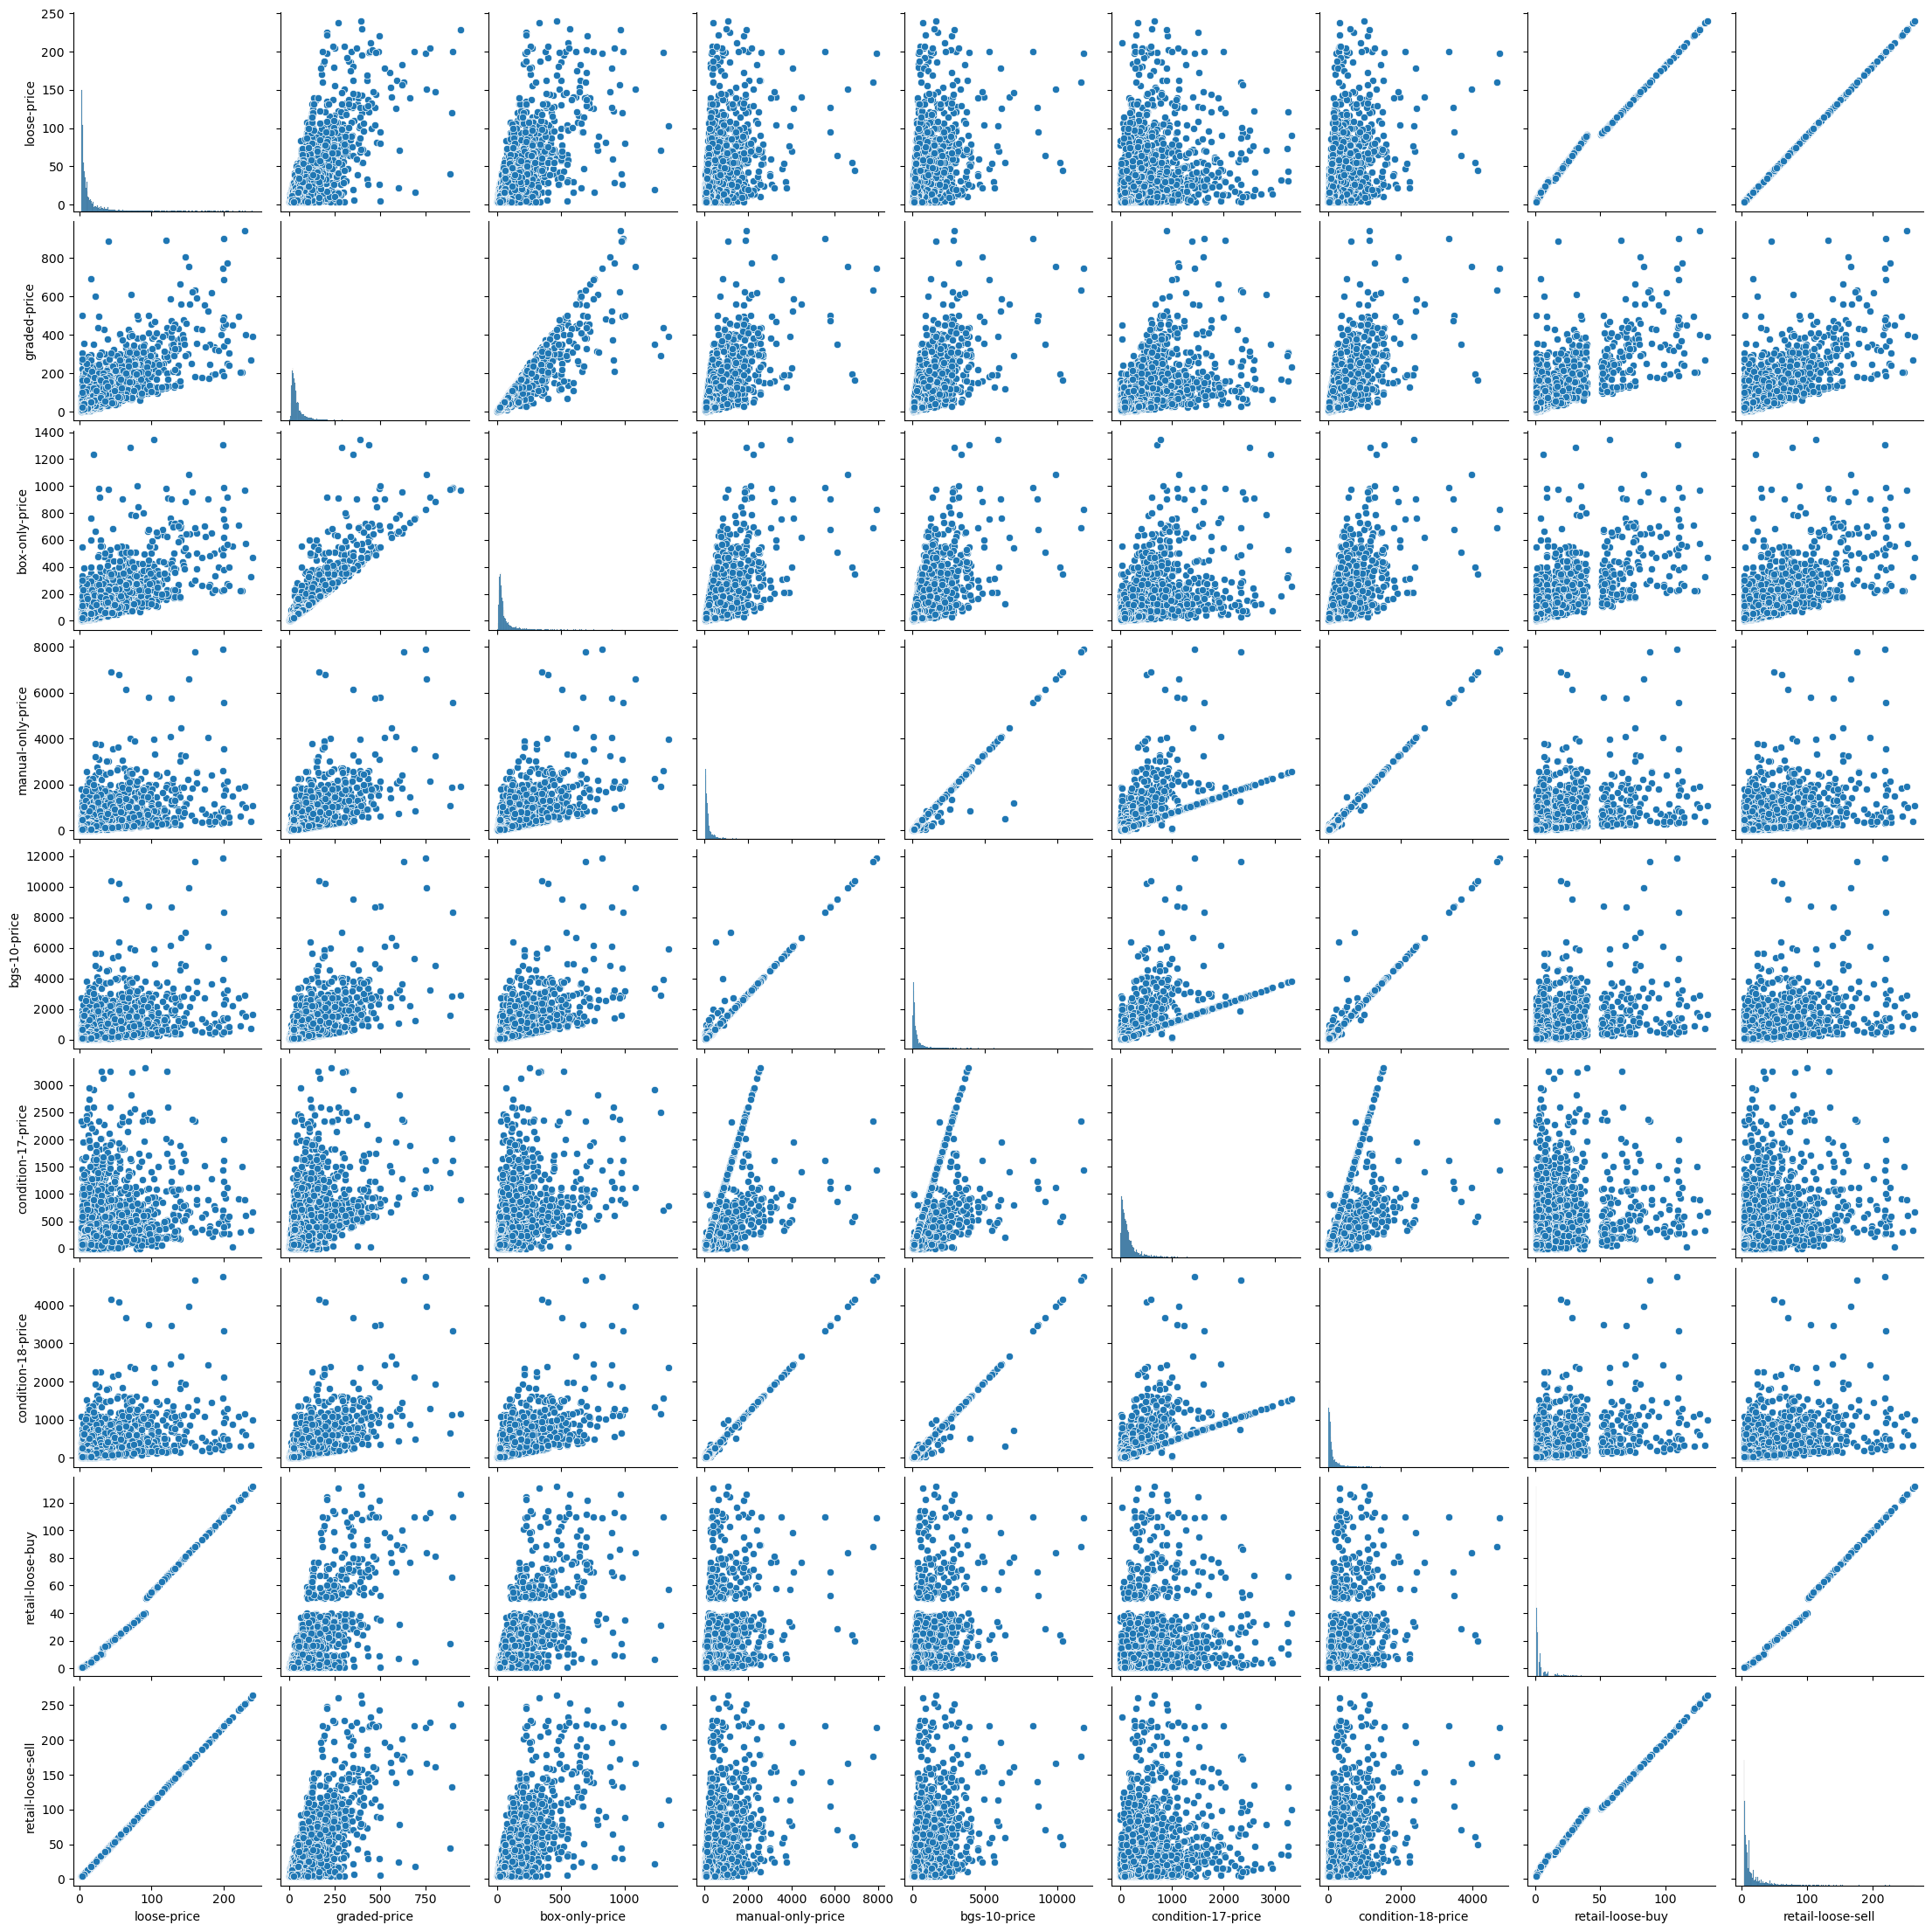

In [449]:
sns.pairplot(drop_extreme)